# Naive Bayes

Naive Bayes uses Bayes Theorem to find out the best hypothesis given data. Bayes Theorem states:
$$P\left(X \ | \ Y\right)=\frac{P\left(Y \ | \ X\right)\cdot P\left(X\right)}{P\left(Y\right)}$$

Where,

1. P(X|Y) is the posterior probability
2. P(Y|X) is the probability assuming that the hypothesis were true. 
3. P(X) is the prior probability which is irrespective of data. 
4. P(Y) is probability of the data, irrespective of hypothesis. 

Once we have these probabilities, in the end we choose the hypothesis with the maximum probability. This is also called as __Maximum A Posteriori (MAP) Estimation__

### Naive Bayes is called "Naive" ?

Naive Bayes classifier assumes that the presence (or absence) of a particular feature of a class is unrelated to the presence (or absence) of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 4" in diameter. Even if these features depend on each other or upon the existence of the other features, a naive Bayes classifier considers all of these properties to independently contribute to the probability that this fruit is an apple.

While calculating P(Y|X) we simply multiply the terms, eg P(Y0, Y1, Y2 | X) = P(Y0|X) \* P(Y1|X) \* P(Y2|X). Here we assume independce between Y0, Y1 etc. which may or may not be true. 

## Gaussian Naive Bayes

While calculating P(Y|X) we assume the features are categorical, so we can count things. But if there are real valued numbers, we instead take the pdf of the number. We fit a gaussian to the given dataset and take it's pdf instead of P(Y|X)

$$P\left(X \ | \ Y\right)=\frac{PDF\left(Y \ \vert \ X \right)\cdot P\left(X\right)}{PDF\left(Y\right)}$$

### Generative vs Discriminative Model

Genrative models: they try to mimic the underlying process which generated the dataset. 

Disriminative models: these models don't have anything with how the data is generated, they will simply classify things. 

For more read: https://stackoverflow.com/a/879591/1878563

Naive Bayes is a discriminative model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


df=pd.read_csv('/content/drive/My Drive/Data Mining in Science/praktikum/3. Klasifikasi/iris_species.csv').dropna()

# Encoding Species
lable_encoder = LabelEncoder()
df.iloc[:, 5] = lable_encoder.fit_transform(df.iloc[:, 5])

X = df.iloc[:, 1:3].values 
y = df.iloc[:, 5].values
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


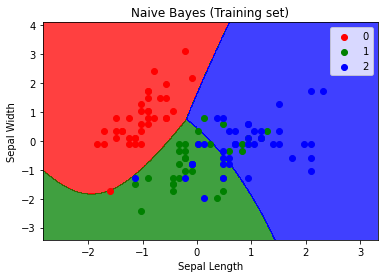

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


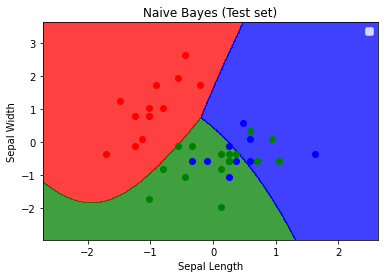

In [0]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green', 'blue'))(i) )
plt.title('Naive Bayes (Test set)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()